In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import category_encoders as ce

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize


import plotly.graph_objects as go
from nltk.corpus import stopwords

In [29]:
df = pd.read_csv("US_Accidents_March23_balanced.csv")
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),City,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,1,37.62278,-77.511887,0.00,Henrico,VA,67.0,70.0,29.96,10.0,...,False,False,False,Day,2022,5,0,23,6,58
1,1,37.50505,-77.504550,0.00,Richmond,VA,60.0,93.0,29.45,10.0,...,False,False,True,Day,2020,4,4,24,18,14
2,1,25.78660,-80.212510,0.00,Miami,FL,92.0,54.0,30.04,10.0,...,False,False,False,Day,2020,6,5,27,16,43
3,1,39.85339,-105.081734,0.00,Arvada,CO,66.0,56.0,24.57,10.0,...,False,False,True,Day,2022,7,1,12,8,21
4,1,26.61352,-81.804558,1.46,Fort Myers,FL,79.0,84.0,30.13,10.0,...,False,False,False,Night,2022,8,0,1,5,20


In [30]:
X = df

In [5]:
scaler = MinMaxScaler()
features = ['Temperature(F)','Distance(mi)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Start_Lng','Start_Lat','Year', 'Month','Weekday','Day','Hour','Minute']
X[features] = scaler.fit_transform(X[features])
X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),City,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,1,0.534242,0.829552,0.000000,Henrico,VA,0.681223,0.696970,0.964553,0.083333,...,False,False,False,Day,0.857143,0.363636,0.166667,0.733333,0.260870,0.983051
1,1,0.529423,0.829681,0.000000,Richmond,VA,0.650655,0.929293,0.947967,0.083333,...,False,False,True,Day,0.571429,0.272727,0.833333,0.766667,0.782609,0.237288
2,1,0.049720,0.781910,0.000000,Miami,FL,0.790393,0.535354,0.967154,0.083333,...,False,False,False,Day,0.571429,0.454545,1.000000,0.866667,0.695652,0.728814
3,1,0.625554,0.343190,0.000000,Arvada,CO,0.676856,0.555556,0.789268,0.083333,...,False,False,True,Day,0.857143,0.545455,0.333333,0.366667,0.347826,0.355932
4,1,0.083571,0.753824,0.009327,Fort Myers,FL,0.733624,0.838384,0.970081,0.083333,...,False,False,False,Night,0.857143,0.636364,0.166667,0.000000,0.217391,0.338983


In [6]:
categorical_features = set(["City", "State", "Wind_Direction", "Weather_Condition", "Civil_Twilight"])

for cat in categorical_features:
    X[cat] = X[cat].astype("category")

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250296 entries, 0 to 250295
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Severity           250296 non-null  int64   
 1   Start_Lat          250296 non-null  float64 
 2   Start_Lng          250296 non-null  float64 
 3   Distance(mi)       250296 non-null  float64 
 4   City               250296 non-null  category
 5   State              250296 non-null  category
 6   Temperature(F)     250296 non-null  float64 
 7   Humidity(%)        250296 non-null  float64 
 8   Pressure(in)       250296 non-null  float64 
 9   Visibility(mi)     250296 non-null  float64 
 10  Wind_Direction     250296 non-null  category
 11  Wind_Speed(mph)    250296 non-null  float64 
 12  Precipitation(in)  250296 non-null  float64 
 13  Weather_Condition  250296 non-null  category
 14  Amenity            250296 non-null  bool    
 15  Bump               250296 non-null

In [7]:
print("Unique classes for each categorical feature:")
for cat in categorical_features:
    print("{:15s}".format(cat), "\t", len(X[cat].unique()))

Unique classes for each categorical feature:
State           	 49
Weather_Condition 	 11
Wind_Direction  	 10
City            	 8718
Civil_Twilight  	 2


In [8]:
X = X.replace([True, False], [1, 0])

X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),City,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,1,0.534242,0.829552,0.000000,Henrico,VA,0.681223,0.696970,0.964553,0.083333,...,0,0,0,Day,0.857143,0.363636,0.166667,0.733333,0.260870,0.983051
1,1,0.529423,0.829681,0.000000,Richmond,VA,0.650655,0.929293,0.947967,0.083333,...,0,0,1,Day,0.571429,0.272727,0.833333,0.766667,0.782609,0.237288
2,1,0.049720,0.781910,0.000000,Miami,FL,0.790393,0.535354,0.967154,0.083333,...,0,0,0,Day,0.571429,0.454545,1.000000,0.866667,0.695652,0.728814
3,1,0.625554,0.343190,0.000000,Arvada,CO,0.676856,0.555556,0.789268,0.083333,...,0,0,1,Day,0.857143,0.545455,0.333333,0.366667,0.347826,0.355932
4,1,0.083571,0.753824,0.009327,Fort Myers,FL,0.733624,0.838384,0.970081,0.083333,...,0,0,0,Night,0.857143,0.636364,0.166667,0.000000,0.217391,0.338983


In [9]:
# Remove city because it will be encoded later
onehot_cols = list(categorical_features - set(["City"]))

X = pd.get_dummies(X, columns=onehot_cols, drop_first=True)

X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Tornado,Weather_Condition_Windy,Civil_Twilight_Night
0,1,0.534242,0.829552,0.000000,Henrico,0.681223,0.696970,0.964553,0.083333,0.012931,...,False,False,False,False,False,False,False,False,False,False
1,1,0.529423,0.829681,0.000000,Richmond,0.650655,0.929293,0.947967,0.083333,0.038793,...,False,False,True,False,False,False,False,False,False,False
2,1,0.049720,0.781910,0.000000,Miami,0.790393,0.535354,0.967154,0.083333,0.043103,...,False,False,False,False,False,False,False,False,False,False
3,1,0.625554,0.343190,0.000000,Arvada,0.676856,0.555556,0.789268,0.083333,0.030172,...,False,False,False,False,False,False,False,False,False,False
4,1,0.083571,0.753824,0.009327,Fort Myers,0.733624,0.838384,0.970081,0.083333,0.012931,...,False,False,False,False,False,False,False,False,False,True


In [10]:
binary_encoder = ce.binary.BinaryEncoder()

city_binary_enc = binary_encoder.fit_transform(X["City"])
city_binary_enc

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250291,0,0,0,0,0,0,0,0,0,0,0,0,1,1
250292,0,0,0,0,1,0,1,0,1,1,0,1,0,0
250293,0,0,0,0,0,1,1,0,0,0,0,0,0,1
250294,0,1,1,1,0,1,1,1,0,1,0,1,1,0


In [11]:
X = pd.concat([X, city_binary_enc], axis=1).drop("City", axis=1)

X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13
0,1,0.534242,0.829552,0.000000,0.681223,0.696970,0.964553,0.083333,0.012931,0.000000,...,0,0,0,0,0,0,0,0,0,1
1,1,0.529423,0.829681,0.000000,0.650655,0.929293,0.947967,0.083333,0.038793,0.004004,...,0,0,0,0,0,0,0,0,1,0
2,1,0.049720,0.781910,0.000000,0.790393,0.535354,0.967154,0.083333,0.043103,0.000000,...,0,0,0,0,0,0,0,0,1,1
3,1,0.625554,0.343190,0.000000,0.676856,0.555556,0.789268,0.083333,0.030172,0.000000,...,0,0,0,0,0,0,0,1,0,0
4,1,0.083571,0.753824,0.009327,0.733624,0.838384,0.970081,0.083333,0.012931,0.000000,...,0,0,0,0,0,0,0,1,0,1


In [12]:
# Metrics dictionary
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

In [13]:
# Train/Validation - Test split
X, X_test = train_test_split(X, test_size=.2, random_state=42)
print(X.shape, X_test.shape)

(200236, 110) (50060, 110)


In [14]:
sample = X
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

(150177, 109) (150177,)
(50059, 109) (50059,)


In [15]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
parameters = [{"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(rfc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters scores:
{'max_depth': 30, 'n_estimators': 500}
Train score: 0.9951257516130966
Validation score: 0.7921252921552568


In [16]:
print("Default scores:")
rfc.fit(X_train, y_train)
print("Train score:", rfc.score(X_train, y_train))
print("Validation score:", rfc.score(X_validate, y_validate))

Default scores:
Train score: 0.9993607543099143
Validation score: 0.7885894644319703


In [17]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,121.885590,6.491601,2.969398,1.753489,30,500,"{'max_depth': 30, 'n_estimators': 500}",0.791750,0.792382,0.791610,0.787581,0.791144,0.790893,0.001703,1
14,79.964487,3.413493,7.680012,1.366914,30,200,"{'max_depth': 30, 'n_estimators': 200}",0.790984,0.790385,0.790777,0.787182,0.789446,0.789755,0.001391,2
13,48.257410,1.185824,9.043780,0.886258,30,100,"{'max_depth': 30, 'n_estimators': 100}",0.788321,0.788554,0.787548,0.785750,0.787681,0.787571,0.000986,3
12,28.331034,2.566886,8.265526,0.878602,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.784026,0.784592,0.784152,0.783386,0.785750,0.784381,0.000786,4
11,129.209149,2.548913,9.961912,0.897208,15,500,"{'max_depth': 15, 'n_estimators': 500}",0.762751,0.762452,0.761745,0.762211,0.761145,0.762061,0.000564,5
10,51.629650,0.646453,8.650095,1.305654,15,200,"{'max_depth': 15, 'n_estimators': 200}",0.761886,0.763517,0.761445,0.762311,0.760213,0.761874,0.001080,6
9,33.550435,0.532635,7.143415,1.747911,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.761586,0.763084,0.760579,0.761778,0.759114,0.761228,0.001324,7
8,20.669233,2.593669,8.007365,1.200603,15,50,"{'max_depth': 15, 'n_estimators': 50}",0.756093,0.761187,0.759214,0.759880,0.756251,0.758525,0.002024,8
7,85.708711,0.407140,4.858612,0.472178,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.731789,0.732155,0.732279,0.732579,0.729016,0.731563,0.001299,9
6,34.983297,1.565958,7.591731,1.142146,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.732055,0.732554,0.732146,0.729982,0.729715,0.731290,0.001192,10


In [18]:
y_pred = rfc.predict(X_validate)

accuracy["Random Forest"] = accuracy_score(y_validate, y_pred)
f1["Random Forest"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, rfc.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37787
           2       1.00      1.00      1.00     37320
           3       1.00      1.00      1.00     37589
           4       1.00      1.00      1.00     37481

    accuracy                           1.00    150177
   macro avg       1.00      1.00      1.00    150177
weighted avg       1.00      1.00      1.00    150177

              precision    recall  f1-score   support

           1       0.90      0.94      0.92     12335
           2       0.75      0.58      0.65     12635
           3       0.75      0.81      0.78     12524
           4       0.75      0.83      0.79     12565

    accuracy                           0.79     50059
   macro avg       0.79      0.79      0.78     50059
weighted avg       0.79      0.79      0.78     50059



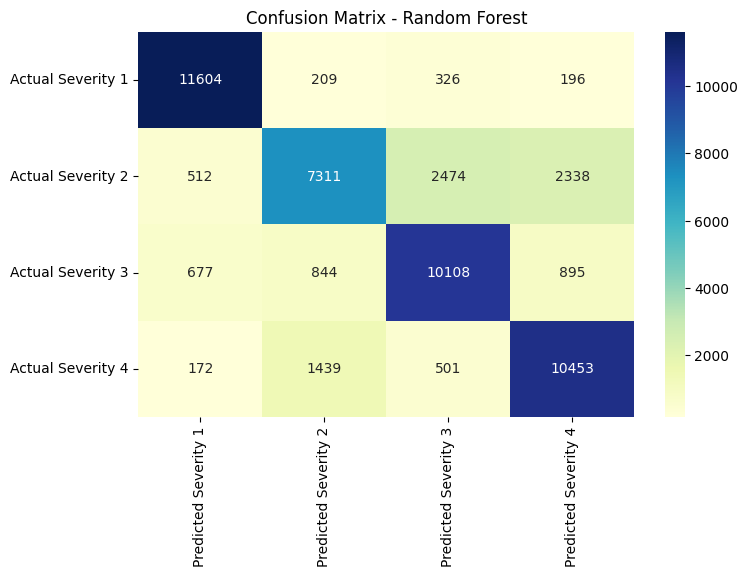

In [19]:
y_pred = rfc.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

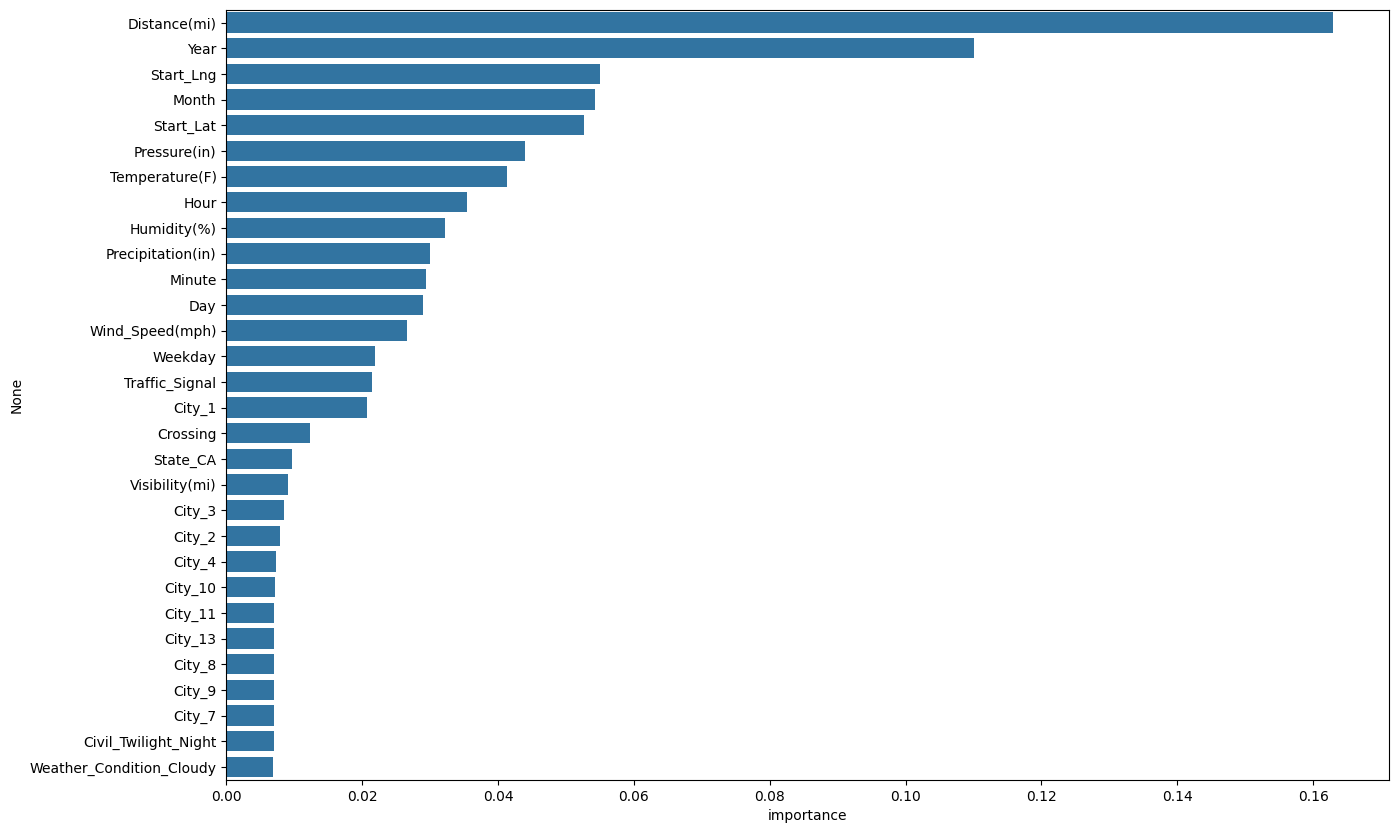

In [20]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = rfc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

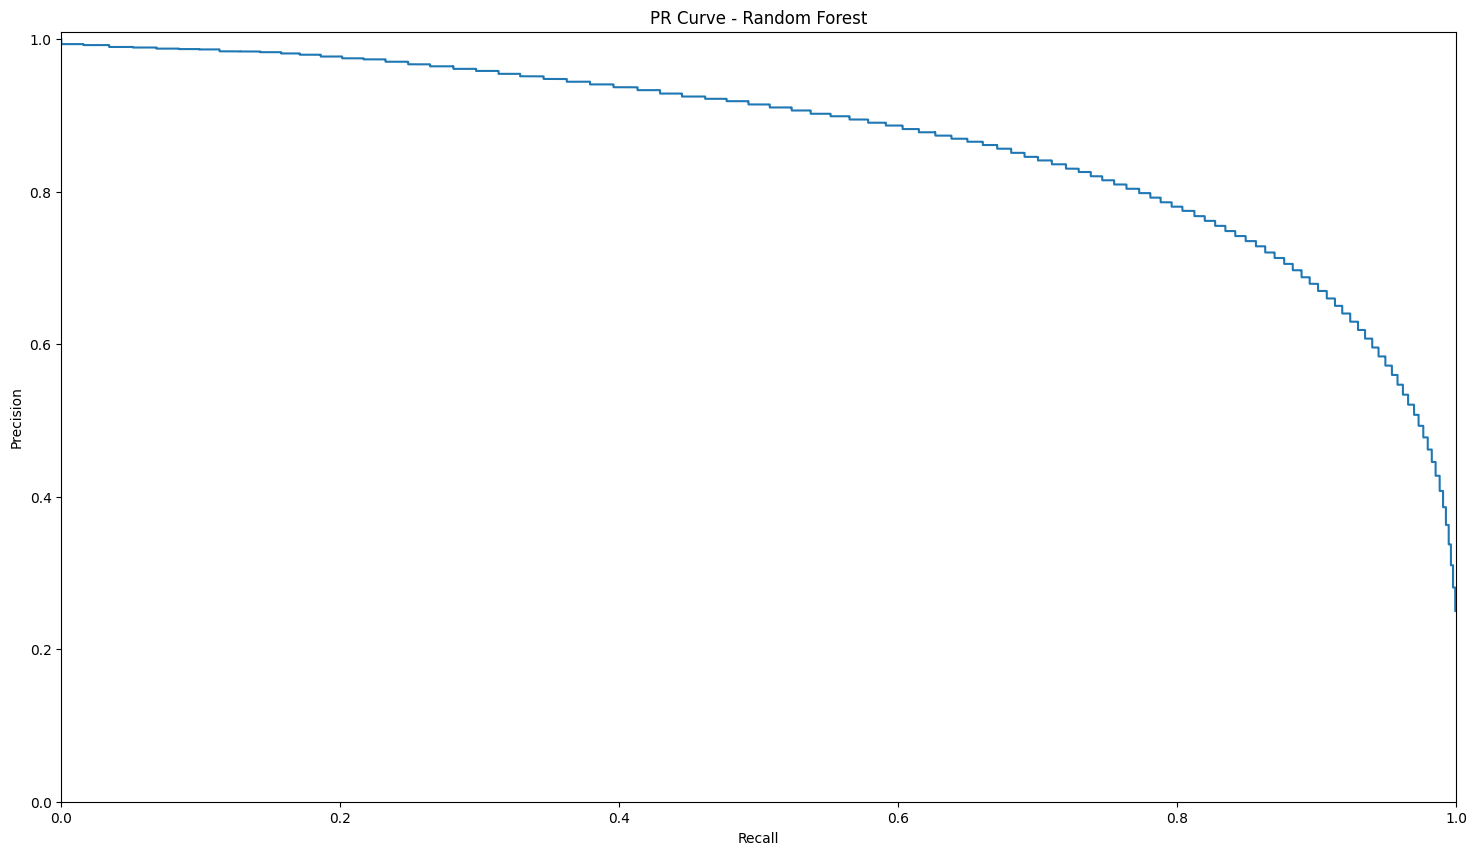

In [21]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = rfc.predict_proba(X_validate)

precision["Random Forest"], recall["Random Forest"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Random Forest"], precision["Random Forest"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Random Forest")
plt.show()

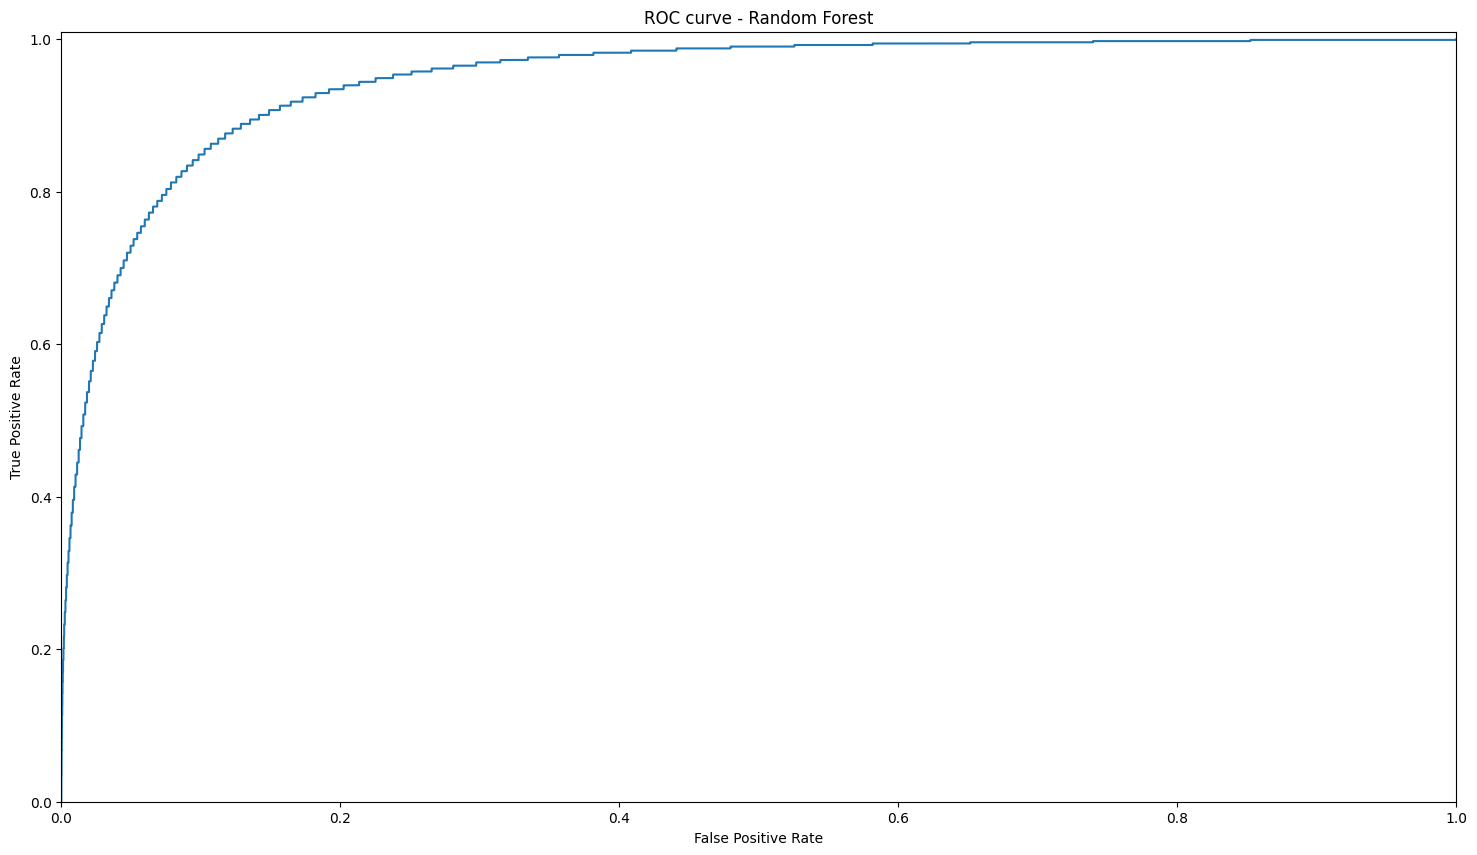

In [22]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Random Forest"], tpr["Random Forest"], where="post")

plt.title("ROC curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()